In [58]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "household-income"

In [86]:
path = '../input/household-income/DataHD98_4.csv'

In [88]:
library(tidyverse)
library(reshape2)
library(dplyr)
library(scales)
library(ggplot2) 
library(ggcorrplot)
library(GGally)
library(ggthemes)
library(ggThemeAssist)
df = read_csv(path)
attach(df)
data = as.data.frame(df)
dim(data)
summary(data)
options(scipen=999, digits = 10)
attach(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  cooler.g = col_logical(),
  ab.l = col_logical(),
  broodat.m = col_logical()
)
ℹ Use `spec()` for the full column specifications.


The following objects are masked from data (pos = 3):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked fro

The following objects are masked from df (pos = 16):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 17):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gende

[1] 2296   68

    Address               C.Ostan            Tedad.a              Gender     
 Min.   :12301265408   Min.   :23.00000   Min.   : 1.000000   Min.   :1.000  
 1st Qu.:12301277710   1st Qu.:23.00000   1st Qu.: 2.000000   1st Qu.:1.000  
 Median :12310289366   Median :23.00000   Median : 3.000000   Median :1.000  
 Mean   :12485193187   Mean   :24.80793   Mean   : 3.254355   Mean   :1.125  
 3rd Qu.:12604323009   3rd Qu.:26.00000   3rd Qu.: 4.000000   3rd Qu.:1.000  
 Max.   :13006383823   Max.   :30.00000   Max.   :10.000000   Max.   :2.000  
                                                                             
      Age               Savad              InEdu               Edu          
 Min.   :21.00000   Min.   :1.000000   Min.   :1.000000   Min.   :1.000000  
 1st Qu.:40.00000   1st Qu.:1.000000   1st Qu.:2.000000   1st Qu.:2.000000  
 Median :50.00000   Median :1.000000   Median :2.000000   Median :4.000000  
 Mean   :51.09321   Mean   :1.105401   Mean   :1.987342   Mean   :3.

The following objects are masked from df (pos = 3):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 4):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender,

The following objects are masked from df (pos = 17):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gender, H_behdasht, H_Ertebatat,
    H_Ghazayeamade, H_Hamlonaghl, H_kalavakhadamat, H_Khorakivadokhani,
    H_Maskan, H_mobleman, H_Noshidani, H_Pushak, H_Tafrihat, hamam,
    hararat.m, InEdu, internet, jaro.b, m.lebas, m.zarf, Masleh,
    microfer, mobile, motor, N.S, oto, package, panke, Pc, radio, S.Z,
    Savad, sookht.ab, sookht.g, sookht.p, T.M.S, T.O, T.shaghel,
    Tedad.a, tel, TV.r, TV.S, yakhchal, yakhchal.f, zabt


The following objects are masked from data (pos = 18):

    ab.l, Address, Age, ashpazkhane, bargh, broodat.m, C.Ostan,
    charkh.kh, cooler.a, cooler.a.s, cooler.g, cooler.g.s, D_Azad,
    D_Motefaraghe, D_Mozd, D_Yarane, do, DVD, Edu, Faaliat, fazelab,
    freeizer, gaz, gaz.l, Gende

In [89]:
data=data[,-c(35,38,46)]
sum(is.na(data))/prod(dim(data))
colnames(data)
summary(data$oto)
data$oto[is.na(data$oto)]=0
summary(data$motor)
data$motor[is.na(data$motor)]=0
summary(data$do)
data$do[is.na(data$do)]=0
summary(data$radio)
data$radio[is.na(data$radio)]=0
summary(data$zabt)
data$zabt[is.na(data$zabt)]=0
summary(data$TV.S)
data$TV.S[is.na(data$TV.S)]=0
summary(data$TV.r)
data$TV.r[is.na(data$TV.r)]=0
summary(data$DVD)
data$DVD[is.na(data$DVD)]=0
summary(data$Pc)
data$Pc[is.na(data$Pc)]=0
summary(data$mobile)
data$mobile[is.na(data$mobile)]=0
summary(data$freeizer)
data$freeizer[is.na(data$freeizer)]=0
summary(data$yakhchal)
data$yakhchal[is.na(data$yakhchal)]=0
summary(data$yakhchal.f)
data$yakhchal.f[is.na(data$yakhchal.f)]=0
summary(data$gaz)
data$gaz[is.na(data$gaz)]=0
summary(data$jaro.b)
data$jaro.b[is.na(data$jaro.b)]=0
summary(data$m.lebas)
data$m.lebas[is.na(data$m.lebas)]=0
summary(data$charkh.kh)
data$charkh.kh[is.na(data$charkh.kh)]=0
summary(data$panke)
data$panke[is.na(data$panke)]=0
summary(data$cooler.a)
data$cooler.a[is.na(data$cooler.a)]=0
summary(data$m.zarf)
data$m.zarf[is.na(data$m.zarf)]=0
summary(data$microfer)
data$microfer[is.na(data$microfer)]=0
summary(data$tel)
data$tel[is.na(data$tel)]=0
summary(data$internet)
data$internet[is.na(data$internet)]=0
summary(data$hamam)
data$hamam[is.na(data$hamam)]=0
summary(data$ashpazkhane)
data$ashpazkhane[is.na(data$ashpazkhane)]=0
summary(data$cooler.a.s)
data$cooler.a.s[is.na(data$cooler.a.s)]=0
summary(data$hararat.m)
data$hararat.m[is.na(data$hararat.m)]=0
summary(data$package)
data$package[is.na(data$package)]=0
summary(data$cooler.g.s)
data$cooler.g.s[is.na(data$cooler.g.s)]=0
summary(data$fazelab)
data$fazelab[is.na(data$fazelab)]=0
summary(data$H_Noshidani)
data$H_Noshidani[is.na(data$H_Noshidani)]=0
summary(data$H_Pushak)
data$H_Pushak[is.na(data$H_Pushak)]=0
summary(data$H_mobleman)
data$H_mobleman[is.na(data$H_mobleman)]=0
summary(data$H_behdasht)
data$H_behdasht[is.na(data$H_behdasht)]=0
summary(data$H_Hamlonaghl)
data$H_Hamlonaghl[is.na(data$H_Hamlonaghl)]=0
summary(data$H_Ertebatat)
data$H_Ertebatat[is.na(data$H_Ertebatat)]=0
summary(data$H_Tafrihat)
data$H_Tafrihat[is.na(data$H_Tafrihat)]=0
summary(data$H_Ghazayeamade)
data$H_Ghazayeamade[is.na(data$H_Ghazayeamade)]=0
summary(data$H_kalavakhadamat)
data$H_kalavakhadamat[is.na(data$H_kalavakhadamat)]=0
summary(data$D_Mozd)
data$D_Mozd[is.na(data$D_Mozd)]=0
summary(data$D_Azad)
data$D_Azad[is.na(data$D_Azad)]=0
summary(data$D_Motefaraghe)
data$D_Motefaraghe[is.na(data$D_Motefaraghe)]=0
summary(data$D_Yarane)
data$D_Yarane[is.na(data$D_Yarane)]=0
data=data[-which(is.na(data$H_Khorakivadokhani)),]


all(which(is.na(data$Edu)) == which(data$Savad==2))
all(which(is.na(data$InEdu)) == which(data$Savad==2))
data$InEdu[which(is.na(data$InEdu))]=0
data$Edu[which(is.na(data$Edu))]=0

data$T.shaghel[which(is.na(data$T.shaghel))]=0

all(which(is.na(data$Masleh)) == which(data$N.S==1 | data$N.S==2))
data$Masleh[which(data$N.S==1)]=3
data$Masleh[which(data$N.S==2)]=5



[1] 0.3512463147

[1] "Address"            "C.Ostan"            "Tedad.a"           
 [4] "Gender"             "Age"                "Savad"             
 [7] "InEdu"              "Edu"                "Faaliat"           
[10] "T.shaghel"          "T.M.S"              "T.O"               
[13] "S.Z"                "N.S"                "Masleh"            
[16] "oto"                "motor"              "do"                
[19] "radio"              "zabt"               "TV.S"              
[22] "TV.r"               "DVD"                "Pc"                
[25] "mobile"             "freeizer"           "yakhchal"          
[28] "yakhchal.f"         "gaz"                "jaro.b"            
[31] "m.lebas"            "charkh.kh"          "panke"             
[34] "cooler.a"           "m.zarf"             "microfer"          
[37] "bargh"              "gaz.l"              "tel"               
[40] "internet"           "hamam"              "ashpazkhane"       
[43] "cooler.a.s"         "hararat.m"          "package"           
[46] "cooler.g.s"         "fazelab"            "sookht.p"          
[49] "sookht.g"           "sookht.ab"          "H_Khorakivadokhani"
[52] "H_Noshidani"        "H_Pushak"           "H_Maskan"          
[55] "H_mobleman"         "H_behdasht"         "H_Hamlonaghl"      
[58] "H_Ertebatat"        "H_Tafrihat"         "H_Ghazayeamade"    
[61] "H_kalavakhadamat"   "D_Mozd"             "D_Azad"            
[64] "D_Motefaraghe"      "D_Yarane"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1038 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2074 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2073 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2269 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2114 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2289 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      30 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1371 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1459 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      97 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1817 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1692 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      15 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1      85 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     175 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1293 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2079 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2275 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2044 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1863 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     584 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     722 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1       7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1     231 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1922 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1845 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    2195 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1       1       1       1       1       1    1317 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   600000  1240000  1474976  2000000 12000000     1835 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    700000   1600000   3070531   3500000 138000000      1486 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   35000.0   391250.0   593500.0   875753.2   920000.0 85430000.0        298 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    10000    600000   1300000   3891430   3400000 200000000       817 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   24000   780000  1420000  2072762  2500000 87800000       95 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   20000.0   500000.0   800000.0   977294.2  1228000.0 13050000.0         27 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   20000   250000   600000  1064670  1337500 10000000     1693 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    20000    430000    890000   2375640   2000000 350000000      1547 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   25000   400000   660000  1005248  1170000 51850000      114 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0  201630002  282900000  335434860  404025000 4267560000       1054 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
   7000000  189300000  280500000  319122261  367750000 2400000000       1584 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max.       NA's 
         0   40790000  187000000  210956503  304250000 1800000000       1025 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 3640000 10920000 16380000 17764565 21840000 43680000      389 

[1] TRUE

[1] TRUE

[1] TRUE

In [90]:
data$C.Ostan[data$C.Ostan==23]='Tehran'
data$C.Ostan[data$C.Ostan==26]='Qazvin'
data$C.Ostan[data$C.Ostan==30]='Alborz'
unique(data$C.Ostan)

data$Gender[data$Gender==1]='Male'
data$Gender[data$Gender==2]='Female'
unique(data$Gender)

data$Savad[data$Savad==1]='Ba Savad'
data$Savad[data$Savad==2]='Bi Savad'
unique(data$Savad)
data$InEdu[data$InEdu==0]='Bi Savad'
data$InEdu[data$InEdu==1]='Yes'
data$InEdu[data$InEdu==2]='No'

data$Edu[data$Edu==0]='Bi Savad'
data$Edu[data$Edu==1]='Ebtedayi'
data$Edu[data$Edu==2]='Rahnamayi'
data$Edu[data$Edu==3]='Motevaseteh'
data$Edu[data$Edu==4]='Diplom'
data$Edu[data$Edu==5]='Kardani'
data$Edu[data$Edu==6]='Karshenasi'
data$Edu[data$Edu==7]='Karshenasi Arshad'
data$Edu[data$Edu==8]='Doctora'
data$Edu[data$Edu==9]='Saayer'

data$Faaliat[data$Faaliat==1]='Shaaghel'
data$Faaliat[data$Faaliat==2]='Bikaar Ba Daramad'
data$Faaliat[data$Faaliat==3]='Bikaar'
data$Faaliat[data$Faaliat==5]='Khanedar'
data$Faaliat[data$Faaliat==6]='Saayer'
data$Faaliat[which(data$Faaliat=='Bikaar' & data$D_Mozd>0)]='Bikaar Ba Daramad'


data$T.M.S[data$T.M.S==1]='Arse va Ayan'
data$T.M.S[data$T.M.S==2]='Ayan'
data$T.M.S[data$T.M.S==3]='Ejaari'
data$T.M.S[data$T.M.S==4]='Rahn'
data$T.M.S[data$T.M.S==5]='Khedmat'
data$T.M.S[data$T.M.S==6]='Raygan'
data$T.M.S[data$T.M.S==7]='Saayer'

data$N.S[data$N.S==1]='Felezi'
data$N.S[data$N.S==2]='Beton'
data$N.S[data$N.S==3]='Saayer'

data$Masleh[data$Masleh==1]='Ajor va Ahan/Sang va Ahan'
data$Masleh[data$Masleh==2]='Ajor va Choob/Sang va Choob'
data$Masleh[data$Masleh==4]='Tamam Ajor/Sang va Ajor'
data$Masleh[data$Masleh==6]='Khesht va Choob'
length(data$Masleh)
data$sookht.p[data$sookht.p==4]='Gaz e TabiE'
data$sookht.p[data$sookht.p==5]='Bargh'
data$sookht.g[data$sookht.g==14]='Gaz e TabiE'
data$sookht.g[data$sookht.g==15]='Bargh'
data$sookht.ab[data$sookht.ab==24]='Gaz e TabiE'
data$sookht.ab[data$sookht.ab==25]='Bargh'


[1] "Tehran" "Qazvin" "Alborz"

[1] "Female" "Male"

[1] "Ba Savad" "Bi Savad"

[1] 2292

In [91]:
data$H_Khorakivadokhani=data$H_Khorakivadokhani/10000
data$H_Noshidani=data$H_Noshidani/10000
data$H_Pushak=data$H_Pushak/10000
data$H_Maskan=data$H_Maskan/10000
data$H_mobleman=data$H_mobleman/10000
data$H_behdasht=data$H_behdasht/10000
data$H_Hamlonaghl=data$H_Hamlonaghl/10000
data$H_Ertebatat=data$H_Ertebatat/10000
data$H_Tafrihat=data$H_Tafrihat/10000
data$H_Ghazayeamade=data$H_Ghazayeamade/10000
data$H_kalavakhadamat=data$H_kalavakhadamat/10000
data$D_Mozd=data$D_Mozd/10000
data$D_Azad=data$D_Azad/10000
data$D_Motefaraghe=data$D_Motefaraghe/10000
data$D_Yarane=data$D_Yarane/10000
data$D_Mozd=data$D_Mozd/12
data$D_Azad=data$D_Azad/12
data$D_Motefaraghe=data$D_Motefaraghe/12
data$D_Yarane=data$D_Yarane/12

data=data[-c(77,104),]
data$H_Kol=data$H_behdasht+data$H_Ertebatat+data$H_Ghazayeamade+data$H_Hamlonaghl+data$H_kalavakhadamat+data$H_Khorakivadokhani+data$H_Maskan+data$H_mobleman+data$H_Noshidani+data$H_Pushak+data$H_Tafrihat
data$H_Kol_log=log(data$H_Kol)

data$D_Kol=data$D_Azad+data$D_Motefaraghe+data$D_Mozd+data$D_Yarane
data$D_Kol_log=log(data$D_Kol)

data$Dahak=data$D_Kol
data$Dahak[which(data$D_Kol>quantile(data$D_Kol,probs = 0.7))]='Por Daramad'
data$Dahak[which(data$D_Kol<=quantile(data$D_Kol,probs = 0.7))]='Kam Daramad'


In [92]:
data$oto=as.factor(data$oto)
data$motor=as.factor(data$motor)
data$do=as.factor(data$do)
data$radio=as.factor(data$radio)
data$zabt=as.factor(data$zabt)
data$TV.S=as.factor(data$TV.S)
data$TV.r=as.factor(data$TV.r)
data$DVD=as.factor(data$DVD)
data$Pc=as.factor(data$Pc)
data$mobile=as.factor(data$mobile)
data$freeizer=as.factor(data$freeizer)
data$yakhchal=as.factor(data$yakhchal)
data$yakhchal.f=as.factor(data$yakhchal.f)
data$gaz=as.factor(data$gaz)
data$jaro.b=as.factor(data$jaro.b)
data$m.lebas=as.factor(data$m.lebas)
data$charkh.kh=as.factor(data$charkh.kh)
data$panke=as.factor(data$panke)
data$cooler.a=as.factor(data$cooler.a)
data$m.zarf=as.factor(data$m.zarf)
data$microfer=as.factor(data$microfer)
data$bargh=as.factor(data$bargh)
data$gaz.l=as.factor(data$gaz.l)
data$tel=as.factor(data$tel)
data$internet=as.factor(data$internet)
data$hamam=as.factor(data$hamam)
data$ashpazkhane=as.factor(data$ashpazkhane)
data$cooler.a.s=as.factor(data$cooler.a.s)
data$hararat.m=as.factor(data$hararat.m)
data$package=as.factor(data$package)
data$cooler.g.s=as.factor(data$cooler.g.s)
data$fazelab=as.factor(data$fazelab)
data$sookht.ab=as.factor(data$sookht.ab)
data$sookht.p=as.factor(data$sookht.p)
data$sookht.g=as.factor(data$sookht.g)
data$C.Ostan=as.factor(data$C.Ostan)
data$Savad=as.factor(data$Savad)
data$InEdu=as.factor(data$InEdu)
data$Edu=as.factor(data$Edu)
data$Faaliat=as.factor(data$Faaliat)
data$T.M.S=as.factor(data$T.M.S)
data$N.S=as.factor(data$N.S)
data$Masleh=as.factor(data$Masleh)
data$Gender=as.factor(data$Gender)
data$Dahak[data$Dahak=='Por Daramad']=1
data$Dahak[data$Dahak=='Kam Daramad']=0
data$Dahak=as.factor(data$Dahak)
summary(data)

    Address              C.Ostan        Tedad.a             Gender    
 Min.   :12301265408   Alborz: 409   Min.   : 1.000000   Female: 282  
 1st Qu.:12301277712   Qazvin: 420   1st Qu.: 2.000000   Male  :2008  
 Median :12310289322   Tehran:1461   Median : 3.000000                
 Mean   :12484452190                 Mean   : 3.259389                
 3rd Qu.:12604322919                 3rd Qu.: 4.000000                
 Max.   :13006383823                 Max.   :10.000000                
                                                                      
      Age                Savad           InEdu                     Edu     
 Min.   :21.00000   Ba Savad:2051   Bi Savad: 239   Diplom           :595  
 1st Qu.:40.00000   Bi Savad: 239   No      :2025   Ebtedayi         :496  
 Median :50.00000                   Yes     :  26   Rahnamayi        :442  
 Mean   :51.04629                                   Karshenasi       :265  
 3rd Qu.:61.00000                                   

In [93]:
data=data[,-c(1,66,67,68,69)]
data=data[,-c(61,62,63,64)]
data=data[,-c(36,37)]

In [94]:
library(rpart.plot)
library(rpart)
library(caret)
library(class)
library(dplyr)
library(e1071)
library(FNN) 
library(gmodels) 
library(psych)
library(RColorBrewer)
library(rattle)
library(nnet) 
library(caret) 
library(neuralnet)
library(caret) 
library(FNN) 
library(forecast)

Loading required package: rpart

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘FNN’


The following objects are masked from ‘package:class’:

    knn, knn.cv


Rattle: A free graphical interface for data science with R.
Version 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [95]:
data.norm <- data
norm.values=preProcess(data.norm[,c(2,4,9,11,12,48,49,50,51,52,53,54,55,56,57,58)],method=c("center","scale"))
data.norm[, c(2,4,9,11,12,48,49,50,51,52,53,54,55,56,57,58)] <- predict(norm.values, data[, c(2,4,9,11,12,48,49,50,51,52,53,54,55,56,57,58)]) 
df1=data.norm[, c(2,4,9,11,12,48,49,50,51,52,53,54,55,56,57,58)]
df2=data.frame(C.Ostan=model.matrix(~factor(data$C.Ostan)-1),Gender=model.matrix(~factor(data$Gender)-1)
               ,Savad=model.matrix(~factor(data$Savad)-1),InEdu=model.matrix(~factor(data$InEdu)-1),
               Edu=model.matrix(~factor(data$Edu)-1),Faaliat=model.matrix(~factor(data$Faaliat)-1),
               T.M.S=model.matrix(~factor(data$T.M.S)-1)
               ,N.S=model.matrix(~factor(data$N.S)-1),Masleh=model.matrix(~factor(data$Masleh)-1),oto=model.matrix(~factor(data$oto)-1),
               motor=model.matrix(~factor(data$motor)-1),do=model.matrix(~factor(data$do)-1),radio=model.matrix(~factor(data$radio)-1),
               zabt=model.matrix(~factor(data$zabt)-1),TV.S=model.matrix(~factor(data$TV.S)-1),TV.r=model.matrix(~factor(data$TV.r)-1),
               DVD=model.matrix(~factor(data$DVD)-1),Pc=model.matrix(~factor(data$Pc)-1),mobile=model.matrix(~factor(data$mobile)-1),freeizer=model.matrix(~factor(data$freeizer)-1),yakhchal=model.matrix(~factor(data$yakhchal)-1),yakhchal.f=model.matrix(~factor(data$yakhchal.f)-1),
               gaz=model.matrix(~factor(data$gaz)-1),jaro.b=model.matrix(~factor(data$jaro.b)-1),m.lebas=model.matrix(~factor(data$m.lebas)-1),charkh.kh=model.matrix(~factor(data$charkh.kh)-1),panke=model.matrix(~factor(data$panke)-1),
               cooler.a=model.matrix(~factor(data$cooler.a)-1),m.zarf=model.matrix(~factor(data$m.zarf)-1),microfer=model.matrix(~factor(data$microfer)-1),
               tel=model.matrix(~factor(data$tel)-1),internet=model.matrix(~factor(data$internet)-1),hamam=model.matrix(~factor(data$hamam)-1),
               ashpazkhane=model.matrix(~factor(data$ashpazkhane)-1),cooler.a.s=model.matrix(~factor(data$cooler.a.s)-1),hararat.m=model.matrix(~factor(data$hararat.m)-1),
               package=model.matrix(~factor(data$package)-1),cooler.g.s=model.matrix(~factor(data$cooler.g.s)-1),fazelab=model.matrix(~factor(data$fazelab)-1),sookht.p=model.matrix(~factor(data$sookht.p)-1),sookht.g=model.matrix(~factor(data$sookht.g)-1),sookht.ab=model.matrix(~factor(data$sookht.ab)-1),Dahak=as.numeric(data$Dahak))




Data=data.frame(df1,df2)

In [96]:
train.index=sample(c(1:dim(Data)[1]), dim(Data)[1]*0.6)
train.df=Data[train.index,]
valid.df=Data[-train.index,]


In [97]:
dim(train.df)
colnames(train.df)
nn = neuralnet(as.factor(Dahak) ~ . , data=train.df, hidden=1,linear.output=FALSE)
nn$result.matrix

[1] 1374  124

[1] "Tedad.a"                                              
  [2] "Age"                                                  
  [3] "T.shaghel"                                            
  [4] "T.O"                                                  
  [5] "S.Z"                                                  
  [6] "H_Khorakivadokhani"                                   
  [7] "H_Noshidani"                                          
  [8] "H_Pushak"                                             
  [9] "H_Maskan"                                             
 [10] "H_mobleman"                                           
 [11] "H_behdasht"                                           
 [12] "H_Hamlonaghl"                                         
 [13] "H_Ertebatat"                                          
 [14] "H_Tafrihat"                                           
 [15] "H_Ghazayeamade"                                       
 [16] "H_kalavakhadamat"                                     
 [17] "C.Ostan.factor.data.C.Ostan.Alborz"                   
 [18] "C.Ostan.factor.data.C.Ostan.Qazvin"                   
 [19] "C.Ostan.factor.data.C.Ostan.Tehran"                   
 [20] "Gender.factor.data.Gender.Female"                     
 [21] "Gender.factor.data.Gender.Male"                       
 [22] "Savad.factor.data.Savad.Ba.Savad"                     
 [23] "Savad.factor.data.Savad.Bi.Savad"                     
 [24] "InEdu.factor.data.InEdu.Bi.Savad"                     
 [25] "InEdu.factor.data.InEdu.No"                           
 [26] "InEdu.factor.data.InEdu.Yes"                          
 [27] "Edu.factor.data.Edu.Bi.Savad"                         
 [28] "Edu.factor.data.Edu.Diplom"                           
 [29] "Edu.factor.data.Edu.Doctora"                          
 [30] "Edu.factor.data.Edu.Ebtedayi"                         
 [31] "Edu.factor.data.Edu.Kardani"                          
 [32] "Edu.factor.data.Edu.Karshenasi"                       
 [33] "Edu.factor.data.Edu.Karshenasi.Arshad"                
 [34] "Edu.factor.data.Edu.Motevaseteh"                      
 [35] "Edu.factor.data.Edu.Rahnamayi"                        
 [36] "Edu.factor.data.Edu.Saayer"                           
 [37] "Faaliat.factor.data.Faaliat.Bikaar"                   
 [38] "Faaliat.factor.data.Faaliat.Bikaar.Ba.Daramad"        
 [39] "Faaliat.factor.data.Faaliat.Khanedar"                 
 [40] "Faaliat.factor.data.Faaliat.Saayer"                   
 [41] "Faaliat.factor.data.Faaliat.Shaaghel"                 
 [42] "T.M.S.factor.data.T.M.S.Arse.va.Ayan"                 
 [43] "T.M.S.factor.data.T.M.S.Ayan"                         
 [44] "T.M.S.factor.data.T.M.S.Ejaari"                       
 [45] "T.M.S.factor.data.T.M.S.Khedmat"                      
 [46] "T.M.S.factor.data.T.M.S.Rahn"                         
 [47] "T.M.S.factor.data.T.M.S.Raygan"                       
 [48] "T.M.S.factor.data.T.M.S.Saayer"                       
 [49] "N.S.factor.data.N.S.Beton"                            
 [50] "N.S.factor.data.N.S.Felezi"                           
 [51] "N.S.factor.data.N.S.Saayer"                           
 [52] "Masleh.factor.data.Masleh.3"                          
 [53] "Masleh.factor.data.Masleh.5"                          
 [54] "Masleh.factor.data.Masleh.Ajor.va.Ahan.Sang.va.Ahan"  
 [55] "Masleh.factor.data.Masleh.Ajor.va.Choob.Sang.va.Choob"
 [56] "Masleh.factor.data.Masleh.Khesht.va.Choob"            
 [57] "Masleh.factor.data.Masleh.Tamam.Ajor.Sang.va.Ajor"    
 [58] "oto.factor.data.oto.0"                                
 [59] "oto.factor.data.oto.1"                                
 [60] "motor.factor.data.motor.0"                            
 [61] "motor.factor.data.motor.1"                            
 [62] "do.factor.data.do.0"                                  
 [63] "do.factor.data.do.1"                                  
 [64] "radio.factor.data.radio.0"                            
 [65] "radio.factor.data.radio.1" 

error,143.0632541521
reached.threshold,0.0097678876
steps,5599.0000000000
Intercept.to.1layhid1,0.7119306888
Tedad.a.to.1layhid1,-18.1334028368
Age.to.1layhid1,-20.2599273226
T.shaghel.to.1layhid1,-43.1294915435
T.O.to.1layhid1,9.2809173020
S.Z.to.1layhid1,-30.0127594532
H_Khorakivadokhani.to.1layhid1,-1.9832376322
H_Noshidani.to.1layhid1,-3.2877235302


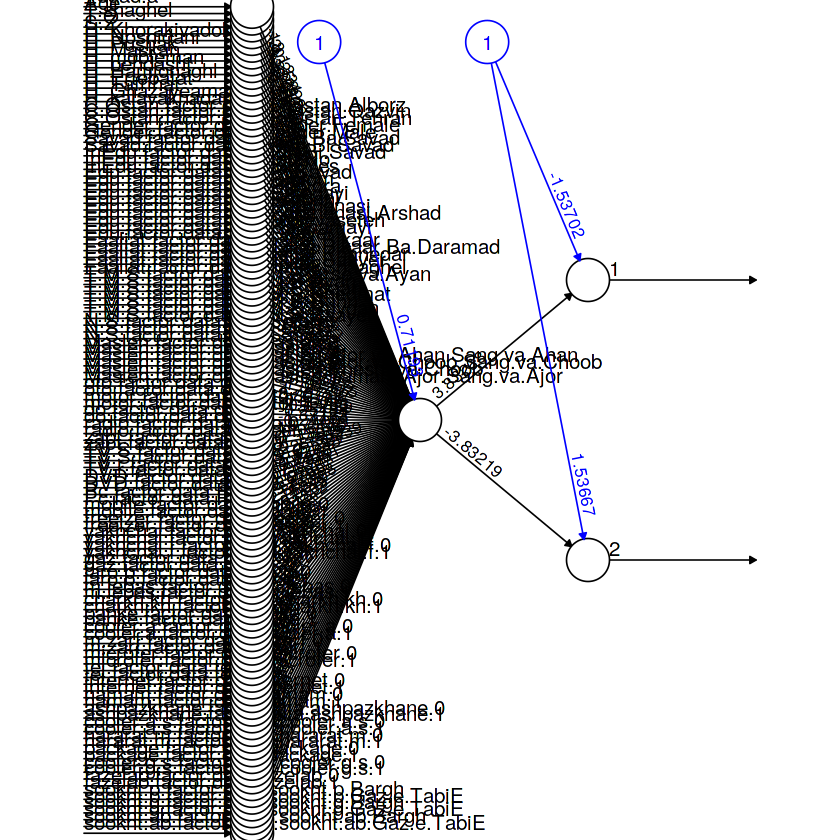

In [98]:

plot(nn,rep="best")

In [99]:
Predict=compute(nn,data.frame(train.df[,-124]))
PredictedClass=apply(Predict$net.result,1,which.max)
confusionMatrix(as.factor(PredictedClass),as.factor(train.df$Dahak))
Predict=compute(nn,data.frame(valid.df[,-124]))
PredictedClass=apply(Predict$net.result,1,which.max)
confusionMatrix(as.factor(PredictedClass),as.factor(valid.df$Dahak))


Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 872  90
         2  74 338
                                                
               Accuracy : 0.8806405             
                 95% CI : (0.8623152, 0.8973192)
    No Information Rate : 0.6885007             
    P-Value [Acc > NIR] : < 0.00000000000000022 
                                                
                  Kappa : 0.7188529             
                                                
 Mcnemar's Test P-Value : 0.2414769             
                                                
            Sensitivity : 0.9217759             
            Specificity : 0.7897196             
         Pos Pred Value : 0.9064449             
         Neg Pred Value : 0.8203883             
             Prevalence : 0.6885007             
         Detection Rate : 0.6346434             
   Detection Prevalence : 0.7001456             
      Balanced Accuracy : 0.8557478             
        

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 557  90
         2 100 169
                                                
               Accuracy : 0.7925764             
                 95% CI : (0.7648518, 0.8184047)
    No Information Rate : 0.7172489             
    P-Value [Acc > NIR] : 0.0000001122381       
                                                
                  Kappa : 0.4945194             
                                                
 Mcnemar's Test P-Value : 0.5138023             
                                                
            Sensitivity : 0.8477930             
            Specificity : 0.6525097             
         Pos Pred Value : 0.8608964             
         Neg Pred Value : 0.6282528             
             Prevalence : 0.7172489             
         Detection Rate : 0.6080786             
   Detection Prevalence : 0.7063319             
      Balanced Accuracy : 0.7501513             
        